In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d raddar/chest-xrays-indiana-university

100% 13.2G/13.2G [02:09<00:00, 102MB/s] 
100% 13.2G/13.2G [02:09<00:00, 109MB/s]


In [ ]:
!unzip /content/chest-xrays-indiana-university.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/images_normalized/219_IM-0799-1001.dcm.png  
  inflating: images/images_normalized/219_IM-0799-2001.dcm.png  
  inflating: images/images_normalized/21_IM-0729-1001-0001.dcm.png  
  inflating: images/images_normalized/21_IM-0729-1001-0002.dcm.png  
  inflating: images/images_normalized/2200_IM-0811-1001.dcm.png  
  inflating: images/images_normalized/2200_IM-0811-2001.dcm.png  
  inflating: images/images_normalized/2201_IM-0811-1002.dcm.png  
  inflating: images/images_normalized/2202_IM-0811-1001.dcm.png  
  inflating: images/images_normalized/2202_IM-0811-1002.dcm.png  
  inflating: images/images_normalized/2203_IM-0812-1001.dcm.png  
  inflating: images/images_normalized/2203_IM-0812-2001.dcm.png  
  inflating: images/images_normalized/2204_IM-0813-1001.dcm.png  
  inflating: images/images_normalized/2204_IM-0813-1002.dcm.png  
  inflating: images/images_normalized/2205_IM-0814-1001.dcm.png  
  inflating: images/i

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
projections = pd.read_csv('/content/indiana_projections.csv')
reports = pd.read_csv("/content/indiana_reports.csv")

In [ ]:
projections.head(),projections.shape

(   uid                filename projection
 0    1  1_IM-0001-4001.dcm.png    Frontal
 1    1  1_IM-0001-3001.dcm.png    Lateral
 2    2  2_IM-0652-1001.dcm.png    Frontal
 3    2  2_IM-0652-2001.dcm.png    Lateral
 4    3  3_IM-1384-1001.dcm.png    Frontal,
 (7466, 3))

In [ ]:
reports.head(),reports.shape

(   uid                                               MeSH  \
 0    1                                             normal   
 1    2  Cardiomegaly/borderline;Pulmonary Artery/enlarged   
 2    3                                             normal   
 3    4  Pulmonary Disease, Chronic Obstructive;Bullous...   
 4    5  Osteophyte/thoracic vertebrae/multiple/small;T...   
 
                                             Problems  \
 0                                             normal   
 1                      Cardiomegaly;Pulmonary Artery   
 2                                             normal   
 3  Pulmonary Disease, Chronic Obstructive;Bullous...   
 4                         Osteophyte;Thickening;Lung   
 
                                                image  \
 0                          Xray Chest PA and Lateral   
 1                Chest, 2 views, frontal and lateral   
 2                          Xray Chest PA and Lateral   
 3  PA and lateral views of the chest XXXX, XXXX a... 

In [ ]:
data = pd.merge(projections, reports, on='uid')

In [ ]:
data.head()

,uid,filename,projection,MeSH,Problems,image,indication,comparison,findings,impression
0,1,1_IM-0001-4001.dcm.png,Frontal,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,1,1_IM-0001-3001.dcm.png,Lateral,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
2,2,2_IM-0652-1001.dcm.png,Frontal,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
3,2,2_IM-0652-2001.dcm.png,Lateral,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
4,3,3_IM-1384-1001.dcm.png,Frontal,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."


In [ ]:
data['image_path'] = "/content/images/images_normalized/" + data['filename']

In [ ]:
data.head()

,uid,filename,projection,MeSH,Problems,image,indication,comparison,findings,impression,image_path
0,1,1_IM-0001-4001.dcm.png,Frontal,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,/content/images/images_normalized/1_IM-0001-40...
1,1,1_IM-0001-3001.dcm.png,Lateral,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,/content/images/images_normalized/1_IM-0001-30...
2,2,2_IM-0652-1001.dcm.png,Frontal,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,/content/images/images_normalized/2_IM-0652-10...
3,2,2_IM-0652-2001.dcm.png,Lateral,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,/content/images/images_normalized/2_IM-0652-20...
4,3,3_IM-1384-1001.dcm.png,Frontal,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p...",/content/images/images_normalized/3_IM-1384-10...


'The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax.'

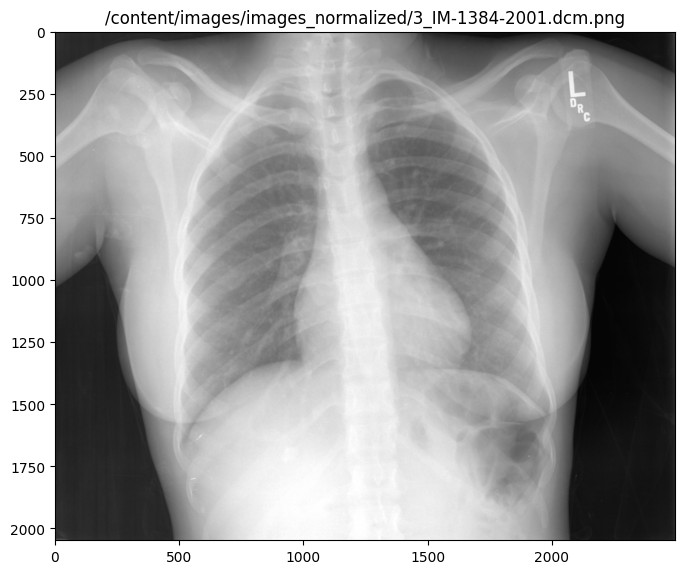

In [ ]:
plt.figure(figsize=(8,7))
img = cv2.imread(data['image_path'].values[0])
plt.imshow(img)
plt.title(data['image_path'].values[5])

data['findings'].values[0]

In [ ]:
data.isnull().sum()

uid              0
filename         0
projection       0
MeSH             0
Problems         0
image            0
indication     159
comparison    1157
findings       997
impression      52
image_path       0
dtype: int64

In [ ]:
data = data[['uid','filename','projection',	'MeSH',	'Problems','findings','image_path']]
data.isnull().sum()

uid             0
filename        0
projection      0
MeSH            0
Problems        0
findings      997
image_path      0
dtype: int64

In [ ]:
data = data.dropna(axis=0) # drop all missing value rows

In [ ]:
#Some patients have more than one image, so we make a dict to hold key as image and value as findings
images = {}
findings = {}

for img,fin in data[['image_path','findings']].values:
    a = img[34:].split('.')
    print(a)
    file_type = a[-1]
    a = a[0].split('-')
    print(a)
    a.pop(len(a)-1)
    print(a)
    a = ('-'.join(e for e in a))
    print(a)
    if a not in images.keys():
        images[a] = 1
        findings[a] = fin
    else:
        images[a] += 1
        findings[a] = fin

Streaming output truncated to the last 5000 lines.
['3241_IM-1534-1001', 'dcm', 'png']
['3241_IM', '1534', '1001']
['3241_IM', '1534']
3241_IM-1534
['3241_IM-1534-2001', 'dcm', 'png']
['3241_IM', '1534', '2001']
['3241_IM', '1534']
3241_IM-1534
['3242_IM-1534-1001', 'dcm', 'png']
['3242_IM', '1534', '1001']
['3242_IM', '1534']
3242_IM-1534
['3242_IM-1534-1002', 'dcm', 'png']
['3242_IM', '1534', '1002']
['3242_IM', '1534']
3242_IM-1534
['3243_IM-1535-0001-0001', 'dcm', 'png']
['3243_IM', '1535', '0001', '0001']
['3243_IM', '1535', '0001']
3243_IM-1535-0001
['3244_IM-1536-1001', 'dcm', 'png']
['3244_IM', '1536', '1001']
['3244_IM', '1536']
3244_IM-1536
['3244_IM-1536-2002', 'dcm', 'png']
['3244_IM', '1536', '2002']
['3244_IM', '1536']
3244_IM-1536
['3245_IM-1537-1001', 'dcm', 'png']
['3245_IM', '1537', '1001']
['3245_IM', '1537']
3245_IM-1537
['3245_IM-1537-4001', 'dcm', 'png']
['3245_IM', '1537', '4001']
['3245_IM', '1537']
3245_IM-1537
['3246_IM-1538-1001', 'dcm', 'png']
['3246_IM', '1

In [ ]:
print('Total Number of Unique_IDs :', len(images.keys()))

Total Number of Unique_IDs : 3350


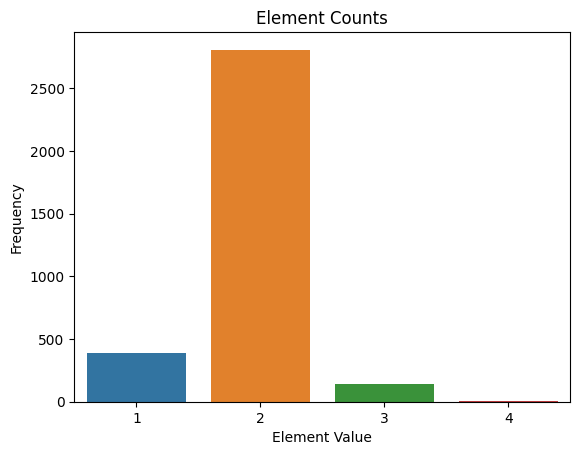

In [ ]:
import seaborn as sns
plt.title('Number of Images  per patients')
sns.countplot(x=pd.Series(images.values()))


# Optional: Customize the plot
plt.title('Element Counts')
plt.xlabel('Element Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [ ]:
def train_test_split(data):
    persons = list(data.keys())
    persons_train = persons[:2500]
    persons_cv = persons[2500:3000]
    persons_test = persons[3000:3350]
    return persons_train, persons_cv, persons_test

images_train, images_cv, images_test = train_test_split(images)

In [ ]:
from collections import defaultdict

def combining_images(image_set):

    image_per_person = defaultdict(list)  # creating a list of dictionary to store all the image paths
                                            #corresponding to a person_id
    for pid in image_set:
        for img in data['image_path'].values:
            if pid in img:
                image_per_person[pid].append(img)
            else:
                continue
    return image_per_person

In [ ]:
img_per_person_train = combining_images(images_train)
img_per_person_cv = combining_images(images_cv)
img_per_person_test = combining_images(images_test)

In [ ]:
img_per_person_train

defaultdict(list,
            {'1_IM-0001': ['/content/images/images_normalized/1_IM-0001-4001.dcm.png',
              '/content/images/images_normalized/1_IM-0001-3001.dcm.png'],
             '2_IM-0652': ['/content/images/images_normalized/2_IM-0652-1001.dcm.png',
              '/content/images/images_normalized/2_IM-0652-2001.dcm.png'],
             '4_IM-2050': ['/content/images/images_normalized/4_IM-2050-1001.dcm.png',
              '/content/images/images_normalized/4_IM-2050-2001.dcm.png'],
             '5_IM-2117': ['/content/images/images_normalized/5_IM-2117-1003002.dcm.png',
              '/content/images/images_normalized/5_IM-2117-1004003.dcm.png'],
             '6_IM-2192': ['/content/images/images_normalized/6_IM-2192-1001.dcm.png',
              '/content/images/images_normalized/6_IM-2192-2001.dcm.png'],
             '7_IM-2263': ['/content/images/images_normalized/7_IM-2263-1001.dcm.png',
              '/content/images/images_normalized/7_IM-2263-2001.dcm.png'],
    

In [ ]:
def load_image(file):
    img = cv2.imread(file)
    return img


In [ ]:
import itertools

def create_data(image_per_person):
    # new dataset
    person_id, image1, image2, report = [],[],[],[]
    for pid, imgs in image_per_person.items():   #contains pid and the images associated with that pid

        if len(imgs) == 1:
            image1.append(imgs[0])
            image2.append(imgs[0])
            person_id.append(pid)
            report.append(findings[pid])
        else:
            num = 0
            a = itertools.combinations(imgs, 2)
            for i in a:
                image1.append(i[0])
                image2.append(i[1])
                person_id.append(pid + '_' + str(num))
                report.append(findings[pid])
                num += 1
    data = pd.DataFrame()
    data['Person_id'] = person_id
    data['Image1'] = image1
    data['Image2'] = image2
    data['Report'] = report

    return data

In [ ]:
train = create_data(img_per_person_train)
test = create_data(img_per_person_test)
valid = create_data(img_per_person_cv)

In [ ]:
train.head()

,Person_id,Image1,Image2,Report
0,1_IM-0001_0,/content/images/images_normalized/1_IM-0001-40...,/content/images/images_normalized/1_IM-0001-30...,The cardiac silhouette and mediastinum size ar...
1,2_IM-0652_0,/content/images/images_normalized/2_IM-0652-10...,/content/images/images_normalized/2_IM-0652-20...,Borderline cardiomegaly. Midline sternotomy XX...
2,4_IM-2050_0,/content/images/images_normalized/4_IM-2050-10...,/content/images/images_normalized/4_IM-2050-20...,There are diffuse bilateral interstitial and a...
3,5_IM-2117_0,/content/images/images_normalized/5_IM-2117-10...,/content/images/images_normalized/5_IM-2117-10...,The cardiomediastinal silhouette and pulmonary...
4,6_IM-2192_0,/content/images/images_normalized/6_IM-2192-10...,/content/images/images_normalized/6_IM-2192-20...,Heart size and mediastinal contour are within ...


In [ ]:
train['Report'][0]

'The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax.'

Text(0.5, 1.0, 'The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax.')

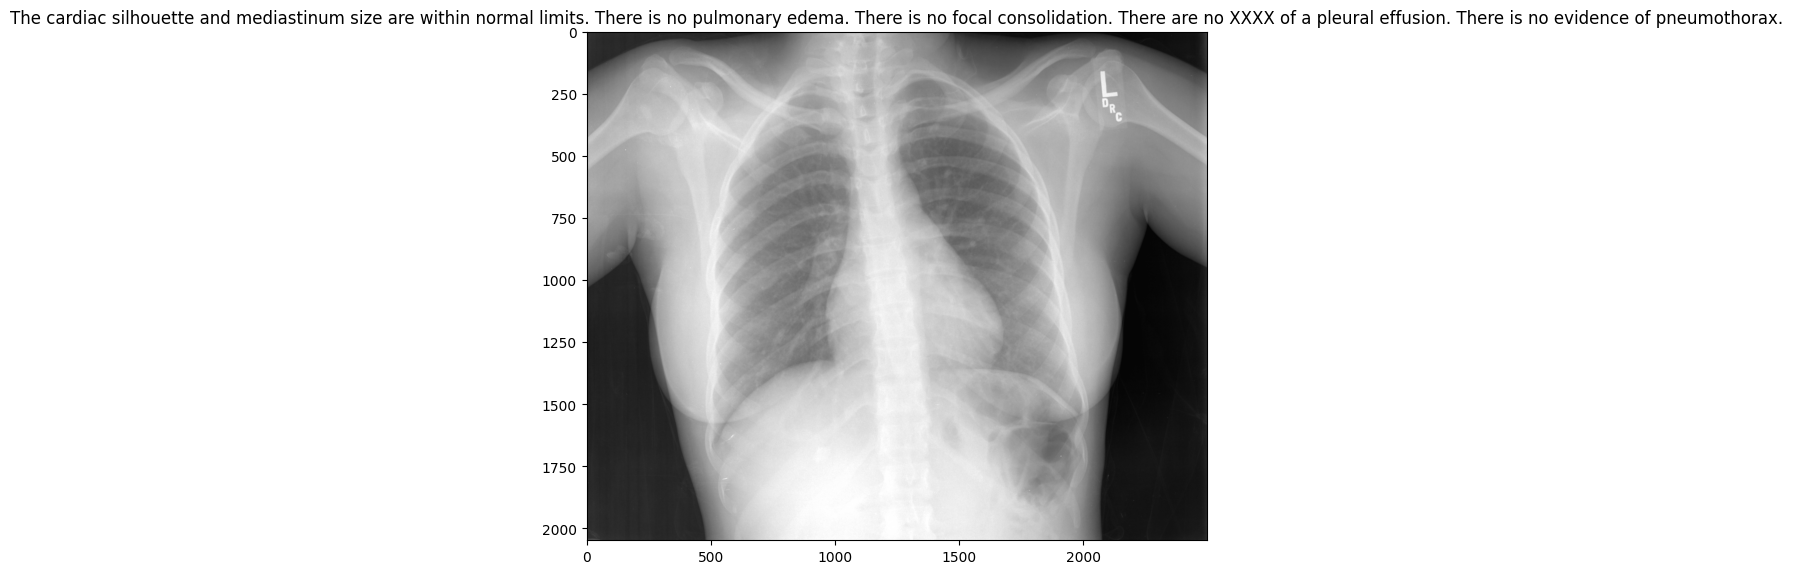

In [ ]:
plt.figure(figsize=(8,7))
img = cv2.imread(train['Image1'].values[0])
plt.imshow(img)
plt.title(train['Report'].values[0])


In [ ]:
import re
def lowercase(text):
    '''Converts to lowercase'''
    new_text = []
    for line in text:
        new_text.append(line.lower())
    return new_text

def decontractions(text):
    '''Performs decontractions in the doc'''
    new_text = []
    for phrase in text:
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)
        phrase = re.sub(r"couldn\'t", "could not", phrase)
        phrase = re.sub(r"shouldn\'t", "should not", phrase)
        phrase = re.sub(r"wouldn\'t", "would not", phrase)
        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r"\*+", "abuse", phrase)
        new_text.append(phrase)

    return new_text

def rem_punctuations(text):
    '''Removes punctuations'''
    punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*~''' # full stop is not removed
    new_text = []
    for line in text:
        for char in line:
            if char in punctuations:
                line = line.replace(char, "")
        new_text.append(' '.join(e for e in line.split()))
    return new_text

def rem_numbers(text):
    '''Removes numbers and irrelevant text like xxxx*'''
    new_text = []
    for line in text:
        temp = re.sub(r'x*','',line)
        new_text.append(re.sub(r'\d','',temp))
    return new_text

def words_filter(text):
    '''Removes words less than 2 characters except no and ct'''
    new_text = []
    for line in text:
        temp = line.split()
        temp2 = []
        for word in temp:
            if  len(word) <=2 and word != 'no' and word != 'ct':
                continue
            else:
                temp2.append(word)
        new_text.append(' '.join(e for e in temp2))
    return new_text

def multiple_fullstops(text):
    ''' Removes multiple full stops from the text'''
    new_text = []
    for line in text:
        new_text.append(re.sub(r'\.\.+', '.', line))
    return new_text

def fullstops(text):
    new_text = []
    for line in text:
        new_text.append(re.sub('\.', ' .', line))
    return new_text

def multiple_spaces(text):
    new_text = []
    for line in text:
        new_text.append(' '.join(e for e in line.split()))
    return new_text

def separting_startg_words(text):
    new_text = []
    for line in text:
        temp = []
        words = line.split()
        for i in words:
            if i.startswith('.') == False:
                temp.append(i)
            else:
                w = i.replace('.','. ')
                temp.append(w)
        new_text.append(' '.join(e for e in temp))
    return new_text

def rem_apostrophes(text):
    new_text = []
    for line in text:
        new_text.append(re.sub("'",'',line))
    return new_text

In [ ]:
def text_preprocessing(text):
    '''Combines all the preprocess functions'''
    new_text = lowercase(text)
    new_text = decontractions(new_text)
    new_text = rem_punctuations(new_text)
    new_text = rem_numbers(new_text)
    new_text = words_filter(new_text)
    new_text = multiple_fullstops(new_text)
    new_text = fullstops(new_text)
    new_text = multiple_spaces(new_text)
    new_text = separting_startg_words(new_text)
    new_text = rem_apostrophes(new_text)
    return new_text

In [ ]:
train['Report'] = text_preprocessing(train['Report'])
test['Report'] = text_preprocessing(test['Report'])
valid['Report'] = text_preprocessing(valid['Report'])

Text(0.5, 1.0, 'the cardiac silhouette and mediastinum size are within normal limits .  there no pulmonary edema .  there no focal consolidation .  there are no pleural effusion .  there no evidence pneumothora . ')

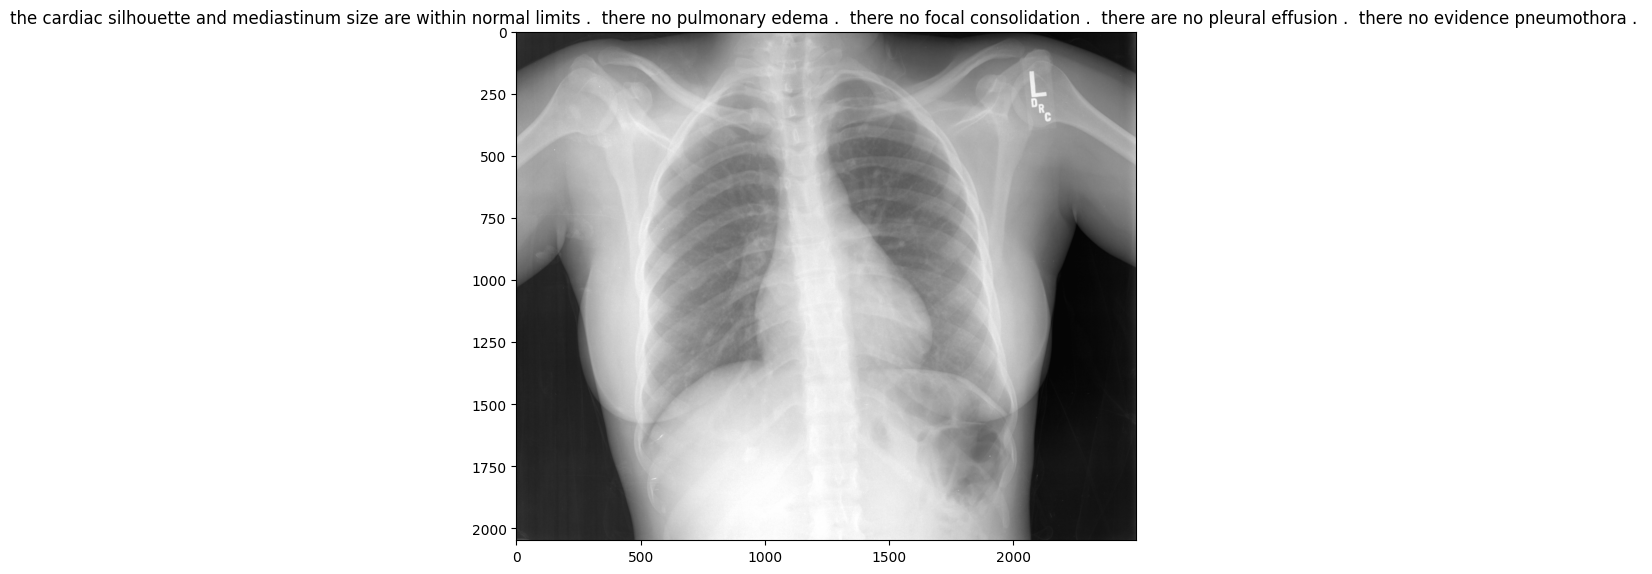

In [ ]:
plt.figure(figsize=(8,7))
img = cv2.imread(train['Image1'].values[0])
plt.imshow(img)
plt.title(train['Report'].values[0])


In [ ]:
train.to_csv('processed_train.csv')
test.to_csv('processed_test.csv')
valid.to_csv('processed_cv.csv')

In [ ]:
train.head()

,Person_id,Image1,Image2,Report
0,1_IM-0001_0,/content/images/images_normalized/1_IM-0001-40...,/content/images/images_normalized/1_IM-0001-30...,the cardiac silhouette and mediastinum size ar...
1,2_IM-0652_0,/content/images/images_normalized/2_IM-0652-10...,/content/images/images_normalized/2_IM-0652-20...,borderline cardiomegaly . midline sternotomy ...
2,4_IM-2050_0,/content/images/images_normalized/4_IM-2050-10...,/content/images/images_normalized/4_IM-2050-20...,there are diffuse bilateral interstitial and a...
3,5_IM-2117_0,/content/images/images_normalized/5_IM-2117-10...,/content/images/images_normalized/5_IM-2117-10...,the cardiomediastinal silhouette and pulmonary...
4,6_IM-2192_0,/content/images/images_normalized/6_IM-2192-10...,/content/images/images_normalized/6_IM-2192-20...,heart size and mediastinal contour are within ...


In [ ]:
def remodelling(x):
    '''adds start and end tokens to a sentence '''
    return 'startseq' + ' ' + x + ' ' + 'endseq'

In [ ]:
train['Report'] = train['Report'].apply(lambda x : remodelling(x))
test['Report'] = test['Report'].apply(lambda x : remodelling(x))
valid['Report'] = valid['Report'].apply(lambda x : remodelling(x))

In [ ]:
# save the cleaned data(STRUCTURED DATA)
train.to_csv('Final_Train_Data.csv', index=False)
test.to_csv('Final_Test_Data.csv', index=False)
valid.to_csv('Final_Valid_Data.csv', index=False)

In [ ]:
train.head()

,Person_id,Image1,Image2,Report
0,1_IM-0001_0,/content/images/images_normalized/1_IM-0001-40...,/content/images/images_normalized/1_IM-0001-30...,startseq the cardiac silhouette and mediastinu...
1,2_IM-0652_0,/content/images/images_normalized/2_IM-0652-10...,/content/images/images_normalized/2_IM-0652-20...,startseq borderline cardiomegaly . midline st...
2,4_IM-2050_0,/content/images/images_normalized/4_IM-2050-10...,/content/images/images_normalized/4_IM-2050-20...,startseq there are diffuse bilateral interstit...
3,5_IM-2117_0,/content/images/images_normalized/5_IM-2117-10...,/content/images/images_normalized/5_IM-2117-10...,startseq the cardiomediastinal silhouette and ...
4,6_IM-2192_0,/content/images/images_normalized/6_IM-2192-10...,/content/images/images_normalized/6_IM-2192-20...,startseq heart size and mediastinal contour ar...


In [ ]:
!pip install torchxrayvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 61.5 MB/s eta 0:00:00


### Data Preparation
- Convert next to numerics and build
  voacbulary

- Do padding for text and setup
  dataloader

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import densenet
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.layers import Dense, Dropout, Input, Conv2D
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
import cv2
import tensorflow as tf
import re
import pickle
from PIL import Image
from skimage.transform import resize
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import time
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Input, Embedding, Conv2D, Concatenate, Flatten, Add, Dropout, GRU
import random
import datetime
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
train_data = pd.read_csv('/content/Final_Train_Data.csv')
test_data = pd.read_csv('/content/Final_Test_Data.csv')
valid_data = pd.read_csv('/content/Final_Valid_Data.csv')

In [ ]:
print('train data shape : ',train_data.shape)
train_data.head(2)

train data shape :  (2753, 4)


,Person_id,Image1,Image2,Report
0,1_IM-0001_0,/content/images/images_normalized/1_IM-0001-40...,/content/images/images_normalized/1_IM-0001-30...,startseq the cardiac silhouette and mediastinu...
1,2_IM-0652_0,/content/images/images_normalized/2_IM-0652-10...,/content/images/images_normalized/2_IM-0652-20...,startseq borderline cardiomegaly . midline st...


In [ ]:
chexNet = densenet.DenseNet121(include_top=False, weights = None,   input_shape=(224,224,3), pooling="avg")
X = chexNet.output
X = Dense(14, activation="sigmoid", name="predictions")(X)
model = Model(inputs=chexNet.input, outputs=X)

In [ ]:
! gdown "https://drive.google.com/u/0/uc?id=19BllaOvs2x5PLV_vlWMy4i8LapLb2j6b&export=download"

Downloading...
From: https://drive.google.com/u/0/uc?id=19BllaOvs2x5PLV_vlWMy4i8LapLb2j6b&export=download
To: /content/brucechou1983_CheXNet_Keras_0.3.0_weights.h5
100% 29.1M/29.1M [00:00<00:00, 145MB/s] 


In [ ]:
#loadind pretrained weights for ChexNet model
model.load_weights('brucechou1983_CheXNet_Keras_0.3.0_weights.h5')

In [ ]:
chexNet = Model(inputs = model.input, outputs = model.layers[-2].output)

In [ ]:
def load_image(img_name):
    image = Image.open(img_name)
    X = np.asarray(image.convert("RGB"))
    X = np.asarray(X)
    X = preprocess_input(X)
    X = resize(X, (224,224,3))
    X = np.expand_dims(X, axis=0)
    X = np.asarray(X)
    return X

In [ ]:
import pickle
# Open the file in read-binary ('rb') mode
with open('/content/Image_features_ecoder_decoder.pickle', 'rb') as file:
    # Use pickle to load the data from the file
    Xnet_features = pickle.load(file)

# Now you can use 'data' like a regular variable. It contains all the data that was stored in your pickle file.


In [ ]:
X_train = train_data['Person_id']
X_test = test_data['Person_id']
X_cv = valid_data['Person_id']
y_train = train_data['Report']
y_test =  test_data['Report']
y_cv =  valid_data['Report']

In [ ]:
cheXnet_Features = Xnet_features

In [ ]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(y_train.values)

In [ ]:
pading_size = 153   # Max length

In [ ]:
vocab_size = len(tokenizer.word_index.keys()) + 1

In [ ]:
!wget https://nlp.stanford.edu/data/glove.6B.zip

--2023-11-21 18:01:41--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-11-21 18:01:41--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  4.91MB/s    in 2m 44s  

2023-11-21 18:04:26 (5.02 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [ ]:
!unzip /content/glove.6B.zip

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
import numpy as np

glove_file = '/content/glove.6B.300d.txt'
glove_vectors = {}

with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
            glove_vectors[word] = coefs
        except ValueError:
            print(f"Skipping line: {line}")

# Optionally, display the size of the loaded embeddings dictionary
print(f"Loaded {len(glove_vectors)} word vectors.")


Loaded 400000 word vectors.


In [ ]:
import pickle

with open('glove_vectors.pkl', 'wb') as f:
    pickle.dump(glove_vectors, f)


In [ ]:
f = open('/content/glove_vectors.pkl','rb') # 300d glove vectors
glove_vectors = pickle.load(f)
f.close()

In [ ]:
embedding_matrix = np.zeros((vocab_size,300))
for word, i in tokenizer.word_index.items():
    if word in glove_vectors.keys():
        vec = glove_vectors[word]
        embedding_matrix[i] = vec
    else:
        continue

In [ ]:
BATCH_SIZE = 12

In [ ]:
def load_image(id_, report):
    '''Loads the Image Features with their corresponding Ids'''
    img_feature = cheXnet_Features[id_.decode('utf-8')][0]
    return img_feature, report

In [ ]:
def dataset_generator(img_name, caption):

    dataset = tf.data.Dataset.from_tensor_slices((img_name, caption))

  # Use map to load the numpy files in parallel
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(load_image, [item1, item2], [tf.float32, tf.string]),
                          num_parallel_calls=tf.data.experimental.AUTOTUNE)

  # Shuffle and batch
    dataset = dataset.shuffle(500).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

In [ ]:
train_generator = dataset_generator(X_train, y_train)
cv_generator = dataset_generator(X_cv, y_cv)

In [ ]:
def bytes_to_string(arr):
    '''The generator gives provides data in bytes. This function converts them back to strings for manipulation'''
    for i in range(len(arr)):
        arr[i] = arr[i].decode('utf-8')
    return arr

In [ ]:
def convert(images, reports):
    '''This function takes the batch of data and converts them into a new dataset'''
    imgs = []
    in_reports = []
    out_reports = []
    for i in range(len(images)):
        sequence = [tokenizer.word_index[e] for e in reports[i].split() if e in tokenizer.word_index.keys()]
      #  print(sequence)
        for j in range(1,len(sequence)):

            in_seq = sequence[:j]
            out_seq = sequence[j]
            out_seq = tf.keras.utils.to_categorical(out_seq, num_classes=vocab_size)

            imgs.append(images[i])
          #  print(in_seq)
            in_reports.append(in_seq)
           # print(out_seq)
            out_reports.append(out_seq)

    return np.array(imgs), np.array(in_reports), np.array(out_reports)

In [ ]:
input1 = Input(shape=(2048), name='Image_input')
dense1 = Dense(256, kernel_initializer=tf.keras.initializers.glorot_uniform(seed = 56), name='dense_encoder')(input1)

input2 = Input(shape=(153), name='Text_Input')
embedding_layer = Embedding(input_dim = vocab_size, output_dim = 300, input_length=153, mask_zero=True, trainable=False,
                weights=[embedding_matrix], name="Embedding_layer")
emb = embedding_layer(input2)

LSTM1 = LSTM(units=256, activation='tanh', recurrent_activation='sigmoid', use_bias=True,
            kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),
            recurrent_initializer=tf.keras.initializers.orthogonal(seed=7),
            bias_initializer=tf.keras.initializers.zeros(), return_sequences=True, name="LSTM1")(emb)
#LSTM1_output = LSTM1(emb)

LSTM2 = LSTM(units=256, activation='tanh', recurrent_activation='sigmoid', use_bias=True,
            kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),
            recurrent_initializer=tf.keras.initializers.orthogonal(seed=7),
            bias_initializer=tf.keras.initializers.zeros(), name="LSTM2")
LSTM2_output = LSTM2(LSTM1)

dropout1 = Dropout(0.5, name='dropout1')(LSTM2_output)

dec =  tf.keras.layers.Add()([dense1, dropout1])

fc1 = Dense(256, activation='relu', kernel_initializer=tf.keras.initializers.he_normal(seed = 63), name='fc1')
fc1_output = fc1(dec)
dropout2 = Dropout(0.4, name='dropout2')(fc1_output)
output_layer = Dense(vocab_size, activation='softmax', name='Output_layer')
output = output_layer(dropout2)

encoder_decoder = Model(inputs = [input1, input2], outputs = output)
encoder_decoder.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Text_Input (InputLayer)     [(None, 153)]                0         []                            
                                                                                                  
 Embedding_layer (Embedding  (None, 153, 300)             437400    ['Text_Input[0][0]']          
 )                                                                                                
                                                                                                  
 LSTM1 (LSTM)                (None, 153, 256)             570368    ['Embedding_layer[0][0]']     
                                                                                                  
 Image_input (InputLayer)    [(None, 2048)]               0         []                      

In [ ]:
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=False, reduction='auto')

def maskedLoss(y_true, y_pred):
    #getting mask value
    mask = tf.math.logical_not(tf.math.equal(y_true, 0))

    #calculating the loss
    loss_ = loss_function(y_true, y_pred)

    #converting mask dtype to loss_ dtype
    mask = tf.cast(mask, dtype=loss_.dtype)

    #applying the mask to loss
    loss_ = loss_*mask

    #getting mean over all the values
    loss_ = tf.reduce_mean(loss_)
    return loss_

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
encoder_decoder.compile(optimizer, loss = maskedLoss)

current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'Tensorboard/logs_m1/fit3/' + current_time + '/train'
val_log_dir = 'Tensorboard/logs_m1/fit3/' + current_time + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
val_summary_writer = tf.summary.create_file_writer(val_log_dir)

In [ ]:
#training for 20 epochs
epoch_train_loss = []
epoch_val_loss = []

for epoch in range(20):
    print('EPOCH : ',epoch+1)
    start = time.time()
    batch_loss_tr = 0
    batch_loss_vl = 0

    for img, report in train_generator:

        r1 = bytes_to_string(report.numpy())
        img_input, rep_input, output_word = convert(img.numpy(), r1)
        rep_input = pad_sequences(rep_input, maxlen=153, padding='post')
        results = encoder_decoder.train_on_batch([img_input, rep_input], output_word)

        batch_loss_tr += results

    train_loss = batch_loss_tr/(X_train.shape[0]//14)
 #   print('Saving Tensorboard')
    with train_summary_writer.as_default():
        tf.summary.scalar('loss', train_loss, step = epoch)

    for img, report in cv_generator:

        r1 = bytes_to_string(report.numpy())
        img_input, rep_input, output_word = convert(img.numpy(), r1)
        rep_input = pad_sequences(rep_input, maxlen=153, padding='post')
        results = encoder_decoder.test_on_batch([img_input, rep_input], output_word)
        batch_loss_vl += results

    val_loss = batch_loss_vl/(X_cv.shape[0]//14)

    with val_summary_writer.as_default():
        tf.summary.scalar('loss', val_loss, step = epoch)

    epoch_train_loss.append(train_loss)

    epoch_val_loss.append(val_loss)

    print('Training Loss: {},  Val Loss: {}'.format(train_loss, val_loss))
    print('Time Taken for this Epoch : {} sec'.format(time.time()-start))
    encoder_decoder.save_weights('encoder_decoder_epoch_'+ str(epoch+1) + '.h5')
    print('--------------------------------------------------------------------------------------------')

EPOCH :  1
Training Loss: 0.0037959954375876306,  Val Loss: 0.0032742059032898397
Time Taken for this Epoch : 33.955779790878296 sec
--------------------------------------------------------------------------------------------
EPOCH :  2
Training Loss: 0.0029652335880590336,  Val Loss: 0.0023140692530432714
Time Taken for this Epoch : 12.508930444717407 sec
--------------------------------------------------------------------------------------------
EPOCH :  3
Training Loss: 0.002347780198538296,  Val Loss: 0.0019029849936487153
Time Taken for this Epoch : 12.358370780944824 sec
--------------------------------------------------------------------------------------------
EPOCH :  4
Training Loss: 0.002036795496158967,  Val Loss: 0.0017471921019023284
Time Taken for this Epoch : 12.629358530044556 sec
--------------------------------------------------------------------------------------------
EPOCH :  5
Training Loss: 0.0018685186425537554,  Val Loss: 0.0016533213449292817
Time Taken for t

Text(0.5, 1.0, 'Loss per epoch')

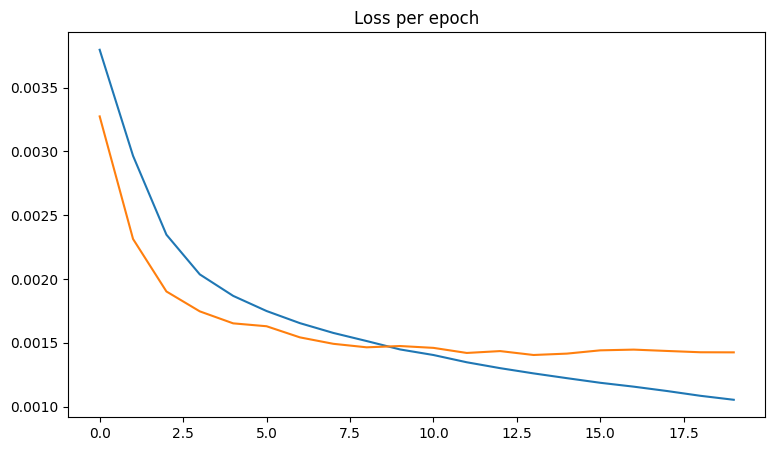

In [ ]:
plt.figure(figsize=(9,5))

plt.plot(epoch_train_loss)
plt.plot(epoch_val_loss)

plt.title('Loss per epoch')

In [ ]:
encoder_decoder.load_weights("/content/encoder_decoder_epoch_7.h5")

In [ ]:
# encoder
encoder_input = encoder_decoder.input[0]
encoder_output = encoder_decoder.get_layer('dense_encoder').output
encoder_model = Model(encoder_input, encoder_output)

# decoder#
text_input = encoder_decoder.input[1]
enc_output = Input(shape=(256,), name='Enc_Output')
text_output = encoder_decoder.get_layer('LSTM2').output
add1 = tf.keras.layers.Add()([text_output, enc_output])
fc_1 = fc1(add1)
decoder_output = output_layer(fc_1)

decoder_model = Model(inputs = [text_input, enc_output], outputs = decoder_output)

In [ ]:
def greedysearch(img):
    image = cheXnet_Features[img]
    input_ = 'startseq'
    image_features = encoder_model.predict(image)

    result = []
    for i in range(153):
        input_tok = [tokenizer.word_index[w] for w in input_.split()]
        input_padded = pad_sequences([input_tok], 153, padding='post')
        predictions = decoder_model.predict([input_padded, image_features])
        arg = np.argmax(predictions)
        if arg != 7:   # endseq
            result.append(tokenizer.index_word[arg])
            input_ = input_ + ' ' + tokenizer.index_word[arg]
        else:
            break
    rep = ' '.join(e for e in result)
    return rep

In [ ]:
def load_image(img_name):
    image = Image.open(img_name)
    X = np.asarray(image.convert("RGB"))
    X = np.asarray(X)
    X = preprocess_input(X)
    X = resize(X, (224,224,3))
    X = np.expand_dims(X, axis=0)
    X = np.asarray(X)
    return X

In [ ]:
def get_result(idx=0):

  plt.figure(figsize=(9,5))

  pre_Report = greedysearch(valid_data['Person_id'][idx]) # result after 20 epochs
  print('------------------------------------------------------------------------------------------------------')
  print("Predicted Report : ",pre_Report)
  print('------------------------------------------------------------------------------------------------------')
  print("Actual Report : ",valid_data['Report'][idx])

  plt.subplot(121)
  img = load_image(valid_data['Image1'][idx])
  plt.imshow(img[0])

  plt.subplot(122)
  img = load_image(valid_data['Image2'][idx])
  plt.imshow(img[0])

1/1 [==============================] - 0s 22ms/step
------------------------------------------------------------------------------------------------------
Predicted Report :  the heart normal size . the mediastinum unremarkable . the lungs are clear .
------------------------------------------------------------------------------------------------------
Actual Report :  startseq cardiomediastinal silhouettes are within normal limits .  lungs are clear without focal consolidation pneumothora pleural effusion .  bony thora unremarkable .  endseq


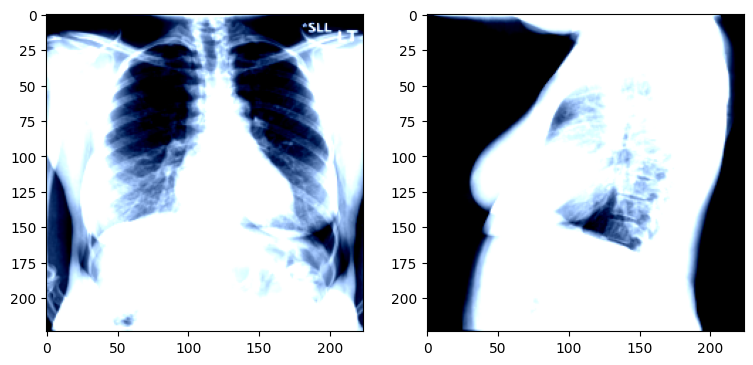

In [ ]:
get_result(2)

In [ ]:
def rem_fullstops(text):
    '''Removes punctuations'''
    punctuations = '''.''' # full stop is not removed
    new_text = []
    for char in text:
        if char in punctuations:
            text = text.replace(char, "")
    new_text.append(' '.join(e for e in text.split()))
    return new_text[0]

In [ ]:
from tqdm.notebook import tqdm

bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []
for img, rep in tqdm(zip(X_cv.values, y_cv.values)):

    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)

    pred_rep = greedysearch(img)
    pred_rep = rem_fullstops(pred_rep)

    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))

0it [00:00, ?it/s]

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 20ms/step


In [ ]:
a = sum(bleu1)/X_cv.shape[0]
b = sum(bleu2)/X_cv.shape[0]
c = sum(bleu3)/X_cv.shape[0]
d = sum(bleu4)/X_cv.shape[0]

print('Bleu1 Score: ',a)
print('Bleu2 Score: ',b)
print('Bleu3 Score: ',c)
print('Bleu4 Score: ',d)

print('-----------------------------------------------------------------------')
print("Avg Blue score:",(a+b+c+d)/4)

Bleu1 Score:  0.21991864001459407
Bleu2 Score:  0.12246367928451475
Bleu3 Score:  0.08025663214775723
Bleu4 Score:  0.04724181351395233
-----------------------------------------------------------------------
Avg Blue score: 0.11747019124020461


In [ ]:
bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []
for img, rep in tqdm(zip(X_test.values, y_test.values)):

    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)

    pred_rep = greedysearch(img)
    pred_rep = rem_fullstops(pred_rep)

    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))

0it [00:00, ?it/s]

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 20ms/step


In [ ]:
a = sum(bleu1)/X_test.shape[0]
b = sum(bleu2)/X_test.shape[0]
c = sum(bleu3)/X_test.shape[0]
d = sum(bleu4)/X_test.shape[0]

print('Bleu1 Score: ',a)
print('Bleu2 Score: ',b)
print('Bleu3 Score: ',c)
print('Bleu4 Score: ',d)

print('-----------------------------------------------------------------------')
print("Avg Blue score:",(a+b+c+d)/4)

Bleu1 Score:  0.19448664592423934
Bleu2 Score:  0.10571653137923945
Bleu3 Score:  0.06665183217866125
Bleu4 Score:  0.03457507347001579
-----------------------------------------------------------------------
Avg Blue score: 0.10035752073803894


In [ ]:
# beam_width = 2
def beamsearch(image, beam_width = 2):

    start = [tokenizer.word_index['startseq']]

    sequences = [[start, 0]]

    img_features = cheXnet_Features[image]
    img_features = encoder_model.predict(img_features)
    finished_seq = []

    for i in range(153):
        all_candidates = []
        new_seq = []
        for s in sequences:

            text_input = pad_sequences([s[0]], 153, padding='post')
            predictions = decoder_model.predict([text_input,img_features])
            top_words = np.argsort(predictions[0])[-beam_width:]
            seq, score = s

            for t in top_words:
                candidates = [seq + [t], score - np.log(predictions[0][t])]
                all_candidates.append(candidates)

        sequences = sorted(all_candidates, key = lambda l: l[1])[:beam_width]
        # checks for 'endseq' in each seq in the beam
        count = 0
        for seq,score in sequences:
            if seq[len(seq)-1] == tokenizer.word_index['endseq']:
                score = score/len(seq)   # normalized
                finished_seq.append([seq, score])
                count+=1
            else:
                new_seq.append([seq, score])
        beam_width -= count
        sequences = new_seq

        # if all the sequences reaches its end before 155 timesteps
        if not sequences:
            break
        else:
            continue

    sequences = finished_seq[-1]
    rep = sequences[0]
    score = sequences[1]
    temp = []
    rep.pop(0)
    for word in rep:
        if word != tokenizer.word_index['endseq']:
            temp.append(tokenizer.index_word[word])
        else:
            break
    rep = ' '.join(e for e in temp)

    return rep, score

In [ ]:
def get_result(beam_width,idx=0):

  plt.figure(figsize=(9,5))

  pre_Report,Score = beamsearch(valid_data['Person_id'][idx],beam_width) # result after 20 epochs
  print('------------------------------------------------------------------------------------------------------')
  print("Predicted Report : ",pre_Report)
  print('Score is :',Score)
  print('------------------------------------------------------------------------------------------------------')
  print("Actual Report : ",valid_data['Report'][idx])

  plt.subplot(121)
  img = load_image(valid_data['Image1'][idx])
  plt.imshow(img[0])

  plt.subplot(122)
  img = load_image(valid_data['Image2'][idx])
  plt.imshow(img[0])

1/1 [==============================] - 0s 20ms/step
------------------------------------------------------------------------------------------------------
Predicted Report :  the heart normal size . the mediastinum unremarkable . the lungs are clear . there no effusion pneumothora .
Score is : 0.4299801096231455
------------------------------------------------------------------------------------------------------
Actual Report :  startseq the heart normal size .  the mediastinum stable .  aorta tortuous .  calcified lymph are again identified .  there mild prominence the right paratracheal soft tissues stable appearance from prior studies .  there no acute infiltrate pleural effusion .  osteopenia and degenerative changes are identified .  deformity appears worse than prior study .  endseq


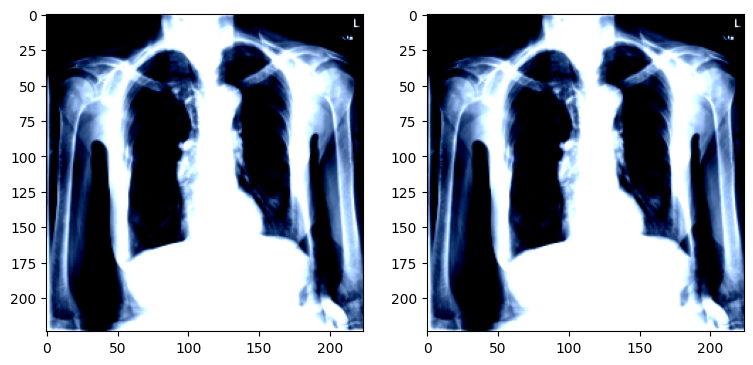

In [ ]:
# beam_width = 2
get_result(2,5)

In [ ]:
from tqdm.notebook import tqdm
# beam_width = 2
'''CV'''

bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []
for img, rep in tqdm(zip(X_cv.values, y_cv.values)):

    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)

    pred_rep,score = beamsearch(img,2)
    pred_rep = rem_fullstops(pred_rep)

    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))

a = sum(bleu1)/X_test.shape[0]
b = sum(bleu2)/X_test.shape[0]
c = sum(bleu3)/X_test.shape[0]
d = sum(bleu4)/X_test.shape[0]

print('CV Bleu1 Score: ',a)
print('CV Bleu2 Score: ',b)
print('CV Bleu3 Score: ',c)
print('CV Bleu4 Score: ',d)

print('-----------------------------------------------------------------------')
print("Avg CV Blue score:",(a+b+c+d)/4)

print('=====================================================================================')

# beam_width = 2
'''TEST'''
bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []

for img, rep in tqdm(zip(X_test.values, y_test.values)):

    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)

    pred_rep,score = beamsearch(img,2)
    pred_rep = rem_fullstops(pred_rep)

    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))

a = sum(bleu1)/X_test.shape[0]
b = sum(bleu2)/X_test.shape[0]
c = sum(bleu3)/X_test.shape[0]
d = sum(bleu4)/X_test.shape[0]

print('Test Bleu1 Score: ',a)
print('Test Bleu2 Score: ',b)
print('Test Bleu3 Score: ',c)
print('Test Bleu4 Score: ',d)

print('-----------------------------------------------------------------------')
print("Avg Test Blue score:",(a+b+c+d)/4)

0it [00:00, ?it/s]

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 20ms/step
CV Bleu1 Score:  0.47927057533273587
CV Bleu2 Score:  0.2793594265099995
CV Bleu3 Score:  0.16672411093935308
CV Bleu4 Score:  0.08487216066540541
-----------------------------------------------------------------------
Avg CV Blue score: 0.2525565683618735


0it [00:00, ?it/s]

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 21ms/step
Test Bleu1 Score:  0.3059381423753604
Test Bleu2 Score:  0.17325260175194374
Test Bleu3 Score:  0.10129140377133773
Test Bleu4 Score:  0.04649591116998597
-----------------------------------------------------------------------
Avg Test Blue score: 0.15674451476715695


In [ ]:
a = sum(bleu1)/X_test.shape[0]
b = sum(bleu2)/X_test.shape[0]
c = sum(bleu3)/X_test.shape[0]
d = sum(bleu4)/X_test.shape[0]

print('Test Bleu1 Score: ',a)
print('Test Bleu2 Score: ',b)
print('Test Bleu3 Score: ',c)
print('Test Bleu4 Score: ',d)

print('-----------------------------------------------------------------------')
print("Avg Test Blue score:",(a+b+c+d)/4)

Test Bleu1 Score:  0.3059381423753604
Test Bleu2 Score:  0.17325260175194374
Test Bleu3 Score:  0.10129140377133773
Test Bleu4 Score:  0.04649591116998597
-----------------------------------------------------------------------
Avg Test Blue score: 0.15674451476715695
